

# PROJECT: INVESTIGATE IMDB MOVIE DATASET

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc. As the first step, let's load the dataset, create some new features. In this kernel, I have analysed this dataset to find top insights and findings.




### Analysis will be based on the below questions:

 - Which movies made the most profit?
 - profit across years
 - Are movies with higher budgets more profitable?
 - Does movie budget have any impact on its popularity?
 - Which year or decade had the most movie release?
 - Is there a correlation between a movie runtime and popularity?Average runtime of most movies
 - Is there any correlation between vote_average and popularity?

<a id='wrangling'></a>
## Data Wrangling

#### General Properties

In [51]:
# This cell sets up import statements for all of the packages that are to be used.
# Includes a 'magic word' so that your visualizations are plotted
# inline with the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

df_movies = pd.read_csv('tmdb_movies.csv')
#df_movies.set_index('imdb_id', inplace=True)
df_movies.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.985763,28.419936,13.112507,11.173104,9.335014
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


In [ ]:
# Data is loaded and a function call head().T is called. 
 - The head() function is used to get the first n rows. 
  - This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
 
  - pandas.DataFrame.T property transposes the index and columns of the data frame. The main function of this property is to create a reflection of the data frame overs the main diagonal by making rows as columns and vice versa.

## The imdb dataset has the following attributes and find below there definition in context to the data being analysed

Columns: 21

Column Names:

 - id: Identification Number
 - imdb_id: IMDB Identification Number
 - popularity: Popularity in number
 - budget: Gross Budget
 - revenue: Gross Revenue
 - original_title: Title of the Movie
 - cast: Cast
 - homepage: Movie website homepage
 - director: The person who directed the movie
 - tagline:
 - keywords:
 - overview: Overview of the movie
 - runtime: How long the movie last
 - genres: What classification the movie belongs to
 - production_companies: What companies produced the movie
 - release_date: The date the movie was released
 - vote_count: How many people voted for the movie
 - vote_average: The average vote rate out of 10
 - release_year: Released Year
 - budget_adj: Movie Budget including 2010 inflation
 - revenue_adj: Movie Revenue including 2010 inflation

In [52]:
#No.of columns and rows [columns: 21, rows: 10866]
df_movies.shape #No.of columns and rows [columns: 21, rows: 10866]

(10866, 21)

In [53]:
#Quick glance about the dataset, using pandas info method
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [54]:
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Upon calling the function **info()**. We can identify from the data provided that some of the column data points are missing values. For example: imdb_id, cast, homepage etc It should be noted as part of the data cleaning process, some of this columns wil be dropped as they'll not offer any useful data to our analysis.

In [55]:
# dropping multiple columns from imdb dataset. For this particular analysis this columns aren't needed.
df_movies.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies','budget_adj','revenue_adj'], axis=1, inplace=True)

# confirm changes
df_movies.head(1)


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [56]:
# confirm changes
df_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [57]:
#No.of columns and rows [columns: 16, rows: 10866] after the columns were dropped
df_movies.shape 

(10866, 13)

In [58]:
#Quick glance about the dataset, using pandas info method
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [59]:
#df_movies.describe()

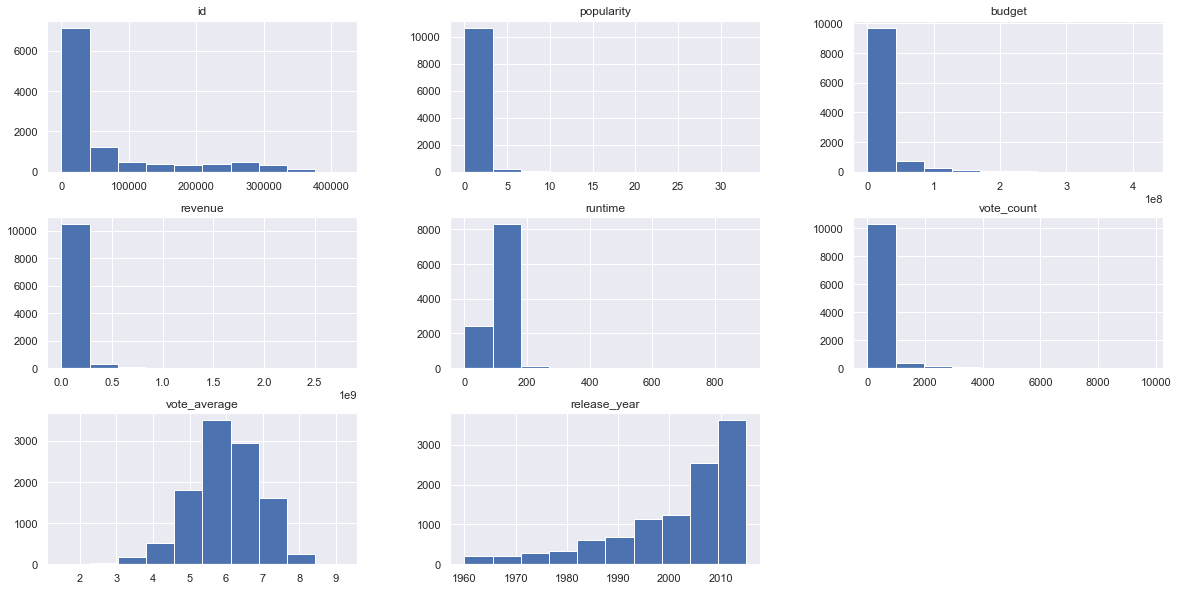

In [60]:
df_movies.hist(figsize=(20, 10));

In [ ]:
## Data Cleaning (Removing The Unused Information From The Dataset
### Information That We Need To Delete Or Modify

 - Remove duplicate rows from the dataset
 - format of release_date to datetime format
 - Remove the unused colums that are not needes in the analysis process.
 - Remove the movies which are having zero value of budget and revenue.


In [61]:
# format of release_date to datetime format
# From the function call info(), there is a type column indicating the data sets type.
# the release_date column had a data type of object indicating its a string. Ideally, date
# components should be of the datetime data type. Below is a conversion of obj to datetime

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], format='%m/%d/%y', errors='ignore')


In [62]:
#Confirming change of datetime type from string object to datetime object
df_movies['release_date'].head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### Upon identifying the null values. I'll drop them. As shown in below cells. I'll start identifying the missing values with isnull() function to identify the rows with missing values and then use the dropna() function to drop the said rows. We'll also check for duplicated data using the duplicated() function and as well drop them using drop_duplicates() function.

In [63]:
df_movies.shape

(10866, 13)

In [64]:
#Missing values
df_movies.isnull().sum(axis=0) 

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [65]:
#df_movies[df_movies.genres.isnull()]

In [66]:
df_movies.dropna(axis=0, inplace=True)

In [67]:
df_movies.shape

(10732, 13)

In [68]:
#checking for null values in the dataset should equal 0
df_movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [69]:
#checking for duplicated_values
sum(df_movies.duplicated())

1

In [70]:
#checking for the duplicated_values.
df_movies[df_movies.duplicated(keep=False)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010


In [71]:
#Dropping duplicated values
df_movies.drop_duplicates(inplace=True)

In [72]:
# check if duplicates are dropped - should be 0
print(sum(df_movies.duplicated()))

0


In [73]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


#### Note: from the df_movies.describe(): Table statistic show that we have the rows for budget, revenue, runtime equalling to zero. Will investigate this further below, and

In [74]:
df_movies.query('budget==0').shape

(5578, 13)

In [75]:
df_movies.query('revenue==0').shape

(5888, 13)

In [76]:
df_movies.query('runtime==0').shape

(28, 13)

#### We'll create a function to take care of replacing the zeros to nan values and then using the dropna() function to drop them 

In [77]:
def del_zero(df_movies_column):
    df_movies_column.replace(0, np.nan, inplace=True)
    return df_movies.dropna(inplace=True)

In [78]:
del_zero(df_movies['revenue'])

In [79]:
del_zero(df_movies['budget'])

In [80]:
del_zero(df_movies['runtime'])

In [81]:
#Checking if the zero were dropped
df_movies.query('budget==0').shape

(0, 13)

In [82]:
#Checking if the zero were dropped
df_movies.query('revenue==0').shape

(0, 13)

In [83]:
#Checking if the zero were dropped
df_movies.query('runtime==0').shape

(0, 13)

In [84]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000
mean,39885.146791,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249
std,67248.890597,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6072.000000,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000
50%,11313.000000,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000
75%,38575.000000,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question :

In [85]:
def plot(in_variable):
    return df_movies.plot(x = in_variable, y='budget', kind='scatter', c=np.array(['blue']))


### 1.0 Which movie made the most profit?

In [86]:
# We'll start by creating the profit column.
# Its from this column will derive the data on the movies that made the most profit
# We'll divide the Revenue and Budget unit figures by 1000000 for better clarity
# When reading the figures from the tables

df_movies['budget'] = df_movies['budget']/1000000
df_movies['revenue'] = df_movies['revenue']/1000000
df_movies['profit'] = df_movies.revenue - df_movies.budget


In [87]:
df_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'profit'],
      dtype='object')

In [88]:
movie_profit = df_movies.groupby(['original_title'], as_index=False)[['profit', 'release_year']].max()
movie_profit = movie_profit.sort_values('profit', ascending=False)
movie_profit.head()

,original_title,profit,release_year
282,Avatar,2544.505847,2009
2582,Star Wars: The Force Awakens,1868.178225,2015
3502,Titanic,1645.034188,1997
1519,Jurassic World,1363.528810,2015
1112,Furious 7,1316.249360,2015


From the bar chart Avatar grossed the highest amount in profits.

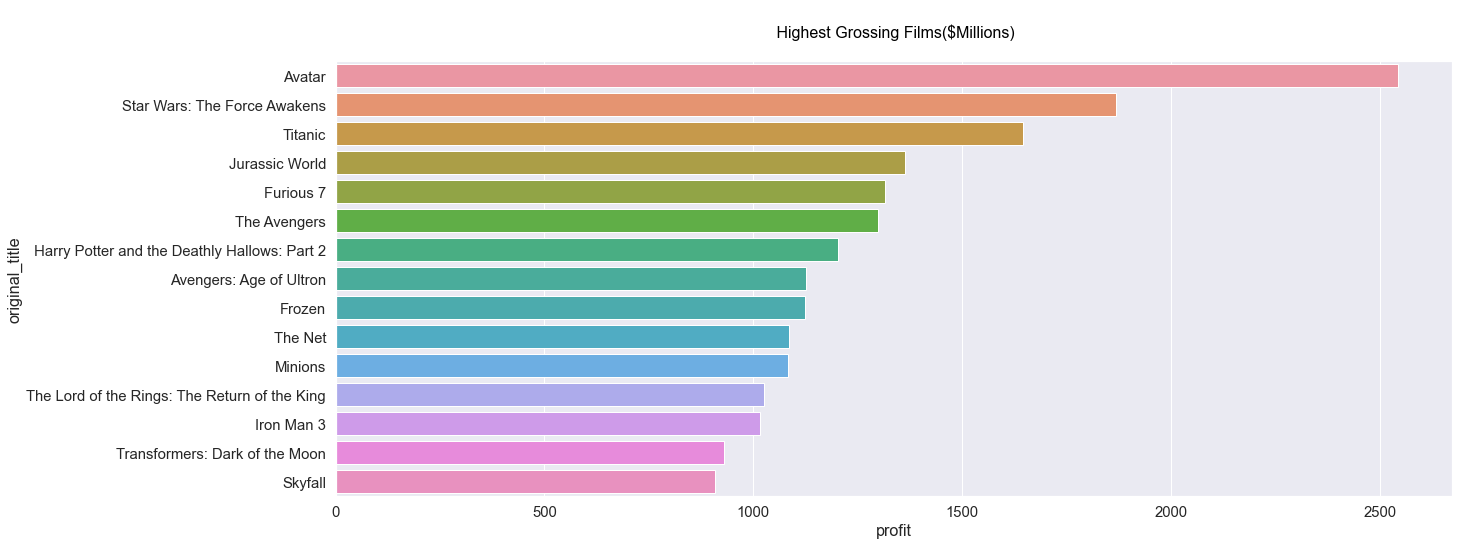

In [89]:
# Scale of text
sns.set(font_scale=1.35)
# Set the width and height of the figure
fig,ax = plt.subplots(figsize=(20,8))

a = sns.barplot(y='original_title', x='profit', 
            data=movie_profit.head(15))

plt.title('\n Highest Grossing Films($Millions)\n', size=16, color='black');


### 1.2 profit across years

We observe from the graph below, that profits across the years more specifically decades was lowest during the 60s with a gradual increase over the decades. Profits was highest during the 2010-2015 period, with a profit in 2015 being equivalent of 118.

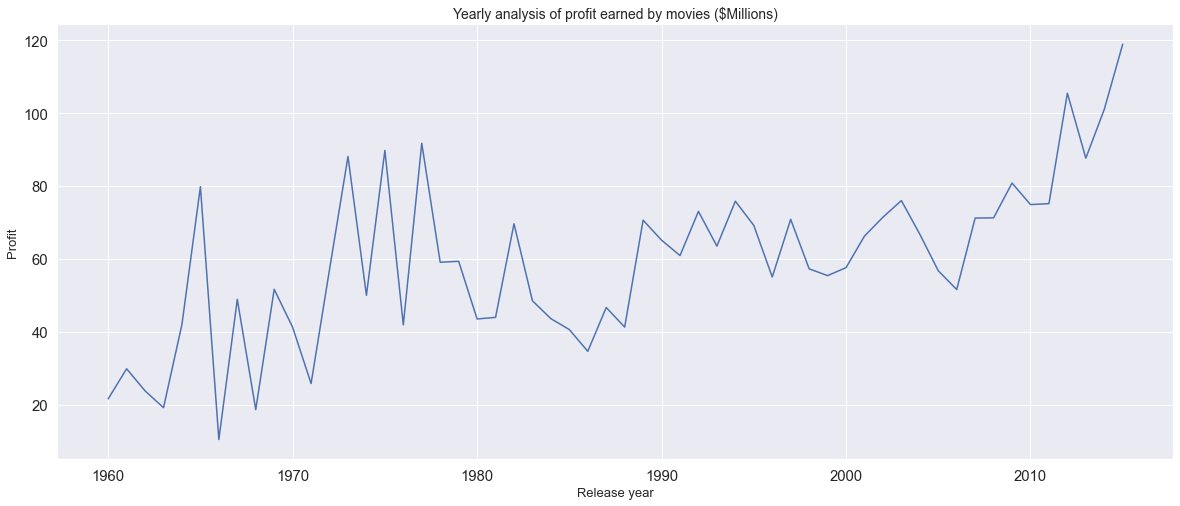

In [90]:
#Yearly analysis of profit earned by movies per decade.
#take the profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.

df_movies.groupby('release_year')['profit'].mean().plot(figsize=(20,8))

#setup the title and labels of the figure.
plt.title("Yearly analysis of profit earned by movies ($Millions)",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Profit',fontsize = 13);

In [91]:
df_movies.groupby('release_year')['profit'].mean().describe()

count     56.000000
mean      59.190535
std       22.605527
min       10.493738
25%       43.631985
50%       58.386177
75%       71.885609
max      118.950908
Name: profit, dtype: float64

### 1.3 Are movies with higher budgets more profitable?

We observe from the graph high budget movies don't necessarily translate to higher profitability. Majority of the movies have moderate budgets and some like Avatar went on to make 10 times its budget in profits.

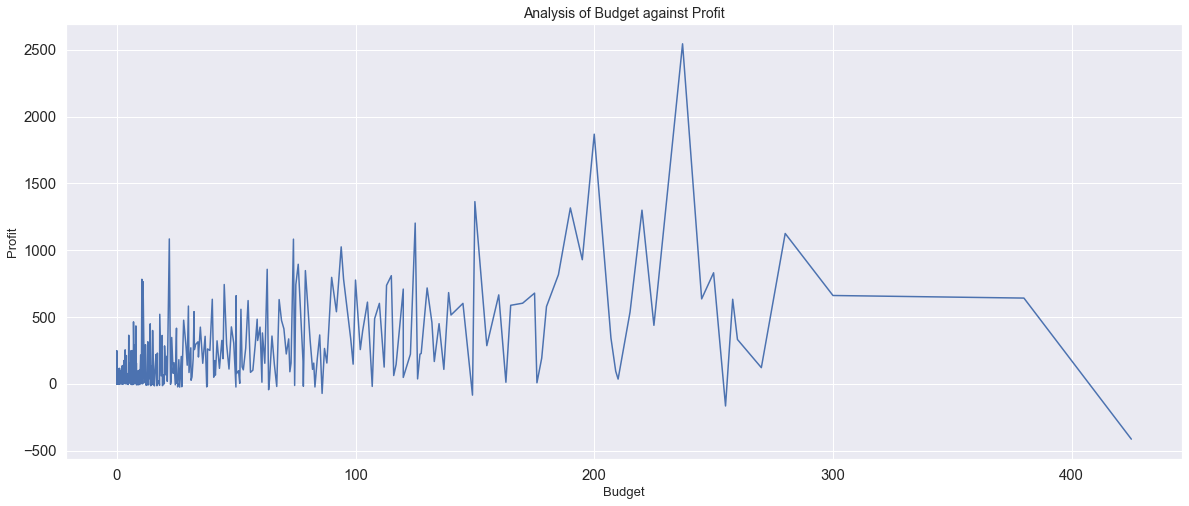

In [92]:
df_movies.groupby('budget')['profit'].max().plot(figsize=(20,8))

#setup the title and labels of the figure.
plt.title("Analysis of Budget against Profit",fontsize = 14)
plt.xlabel('Budget',fontsize = 13)
plt.ylabel('Profit',fontsize = 13);

In [93]:
budget_profit = df_movies.groupby(['budget'], as_index=False)[['profit', 'release_year']].max()
budget_profit = budget_profit.sort_values('profit', ascending=False)
budget_profit.head()

,budget,profit,release_year
394,237.0,2544.505847,2009
387,200.0,1868.178225,2015
374,150.0,1363.528810,2015
385,190.0,1316.249360,2015
392,220.0,1299.557910,2012


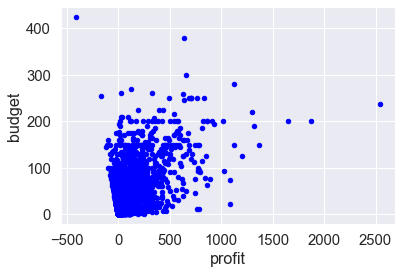

In [94]:
#Are movies with higher budgets more profitable
plot('profit');

### 1.4 Does movie budget have any impact on its popularity?

Popularity is usually based on some viewer or critic ratings database, such as that provided by in this case imdb or similar. But it’s been hypothesized that a film’s budget might actually be a better indicator of popularity rather than critic or viewer ratings. How can we find out? 

**We'll use a scatter plot for a better visualization and also use Pandas dataframe.corr() that is used to find the pairwise correlation of all columns.** 

**Note: the correlation of a variable with itself is 1. For that reason, all the diagonal values are 1.00**

**Result Explained:
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.**

From the table it can be seen that vote_count has a good correlation of 0.77 with the budget, being the highest compared to the columns.It is also well noted that popularity has 0.44 which in my opinion isn't a good correlation.

Furthermore as can be seen by the scatter graph that the budget doesn't necessarily offer much in determining a movies popularity. It is suffice to say: a better films make more money irrespective of its budget.

In [95]:
df_movies.corr().sort_values(by='budget', ascending=False)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
budget,-0.027430,0.446563,1.000000,0.688403,0.261489,0.556681,0.023638,0.268464,0.526660
revenue,-0.003238,0.615348,0.688403,1.000000,0.250728,0.754466,0.227071,0.139316,0.979138
vote_count,0.111551,0.779986,0.556681,0.754466,0.274215,1.000000,0.387262,0.207462,0.728276
profit,0.003890,0.596080,0.526660,0.979138,0.220597,0.728276,0.259503,0.088069,1.000000
popularity,0.189039,1.000000,0.446563,0.615348,0.215510,0.779986,0.317750,0.173599,0.596080
release_year,0.489943,0.173599,0.268464,0.139316,-0.112954,0.207462,-0.133315,1.000000,0.088069
runtime,-0.035191,0.215510,0.261489,0.250728,1.000000,0.274215,0.352615,-0.112954,0.220597
vote_average,-0.000721,0.317750,0.023638,0.227071,0.352615,0.387262,1.000000,-0.133315,0.259503
id,1.000000,0.189039,-0.027430,-0.003238,-0.035191,0.111551,-0.000721,0.489943,0.003890


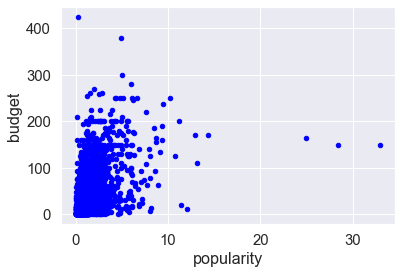

In [96]:
plot('popularity');

### 1.5. Which year  had the most movie release?

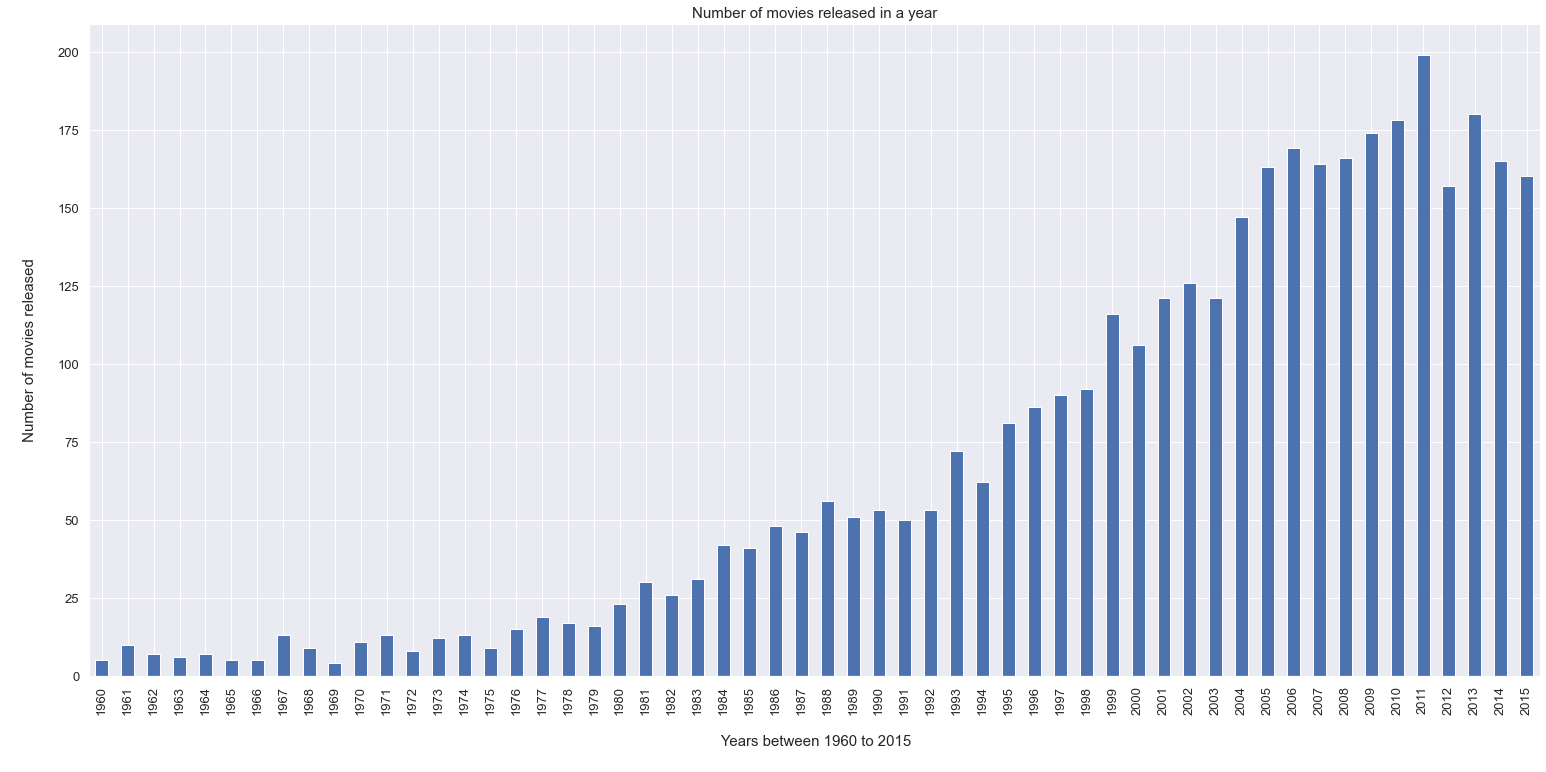

In [97]:
fig, ax = plt.subplots(figsize=(26,12))
df_movies.groupby('release_year').count()['id'].plot(kind='bar', fontsize=13)
plt.title('Number of movies released in a year', fontsize=15)
plt.xlabel('\n Years between 1960 to 2015\n', fontsize=15)
plt.ylabel('\n Number of movies released \n', fontsize=15)
plt.show()

The year 2011 had the highest movies releases than any other year at 199

In [98]:
df_movies.groupby(['release_year'],as_index=False).size()

,release_year,size
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7
5,1965,5
6,1966,5
7,1967,13
8,1968,9
9,1969,4


### Research Question 2

plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df_movies.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### 2.1. Is there a correlation between a movie runtime and popularity?

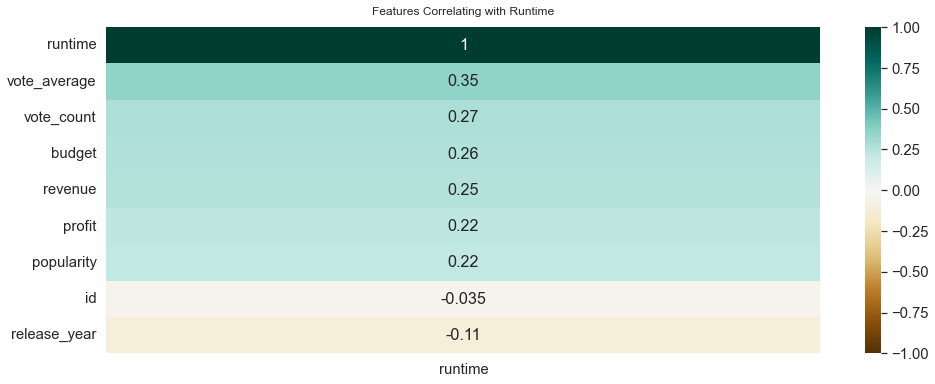

In [99]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df_movies.corr()[['runtime']].sort_values(by='runtime', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Runtime', fontdict={'fontsize':12}, pad=12);

There's a correlation between runtime and popularity but its relatively low at 0.22

### 2.2 Is there any correlation between vote_average and popularity?

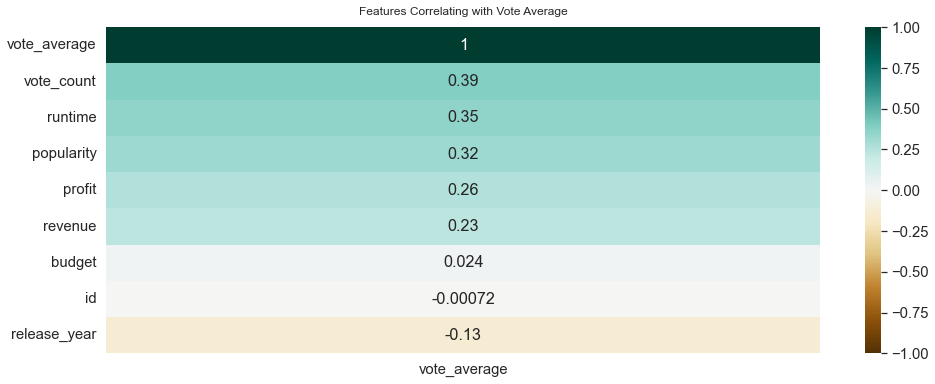

In [100]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df_movies.corr()[['vote_average']].sort_values(by='vote_average', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Vote Average', fontdict={'fontsize':12}, pad=12);

There's a correlation between vote_average and popularity but its quite average at 0.32

# Resource

 - [checking and identifying the duplicated values and using keep](https://stackoverflow.com/questions/26244309/how-to-analyze-all-duplicate-entries-in-this-pandas-dataframe)
 - [bar chart colour configuration](https://www.canva.com/colors/color-meanings/blue/)
 
 - [How to Add Title to Subplots in Matplotlib?](https://www.geeksforgeeks.org/how-to-add-title-to-subplots-in-matplotlib/)
 
 - [How to convert string to datetime format in pandas python?](https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python)
 - [Python Pandas Tutorial](https://www.youtube.com/watch?v=UFuo7EHI8zc&ab_channel=CoreySchafer)
 - [pandas-dataframe-program](https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/?ref=leftbar-rightbar)
 - [Pandas dataframe.corr](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/#:~:text=corr()%20is%20used%20to,the%20dataframe%20it%20is%20ignored.&text=Note%3A%20The%20correlation%20of%20a%20variable%20with%20itself%20is%201.)
 - [How to Create a Seaborn Correlation Heatmap in Python?](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

<a id='conclusions'></a>
## Conclusions

> I used Udacity helper template for this assignment that helped me organise the analysis structure.

> The Dataset wasn't clean. It posed a challenge on how to deal with Zero values in crucial columns such as budget and revenue. Converting the Zero values to Nan values and dropping them from the table meant losing half of the dataset.

> I used correlation matrix to get stats on relationships between dataset. One in particular which was of interest to me: Do hollywood huge budget movie make them popular. The correlation as evident was low. I can conclude consumers want a good movie story irregadless of its budget.

> I analysed movie profitability over the years. Its evident there was an increase from 1960 - 2015. Access to movie at theaters and cheaper internet coupled with the growing streaming sites although not part of this dataset might have contributed to the increase.

> I analysed he popularity of a movie against vote_average to answer how does critics for a particular influence the popularity of a movie. Do movies with low rating from critics actually underperform.  

## Limitation
 - The dataset was filled with a buch of Null values and Zero in some of its columns. Revenue and Budget columns missed values or had values equalling to Zero. Sorting out this Zero values by dropping the rows resulted in the whole dataset data being halved.
 - Crucial missing items from Director and cast columns. 
 - Duplicated items were present also. fortunately it was easily resolved as it was only a single item.
 - Overall i feel in large part the dataset was incomplete, but it posed a good challenge for someone whose a beginner in Data Analysis.